In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

In [ ]:

# Đọc dữ liệu
df = pd.read_csv('stress_detection.csv')
df


,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4,44.220070,17,10,4.086836,4.897873,1.605314,0.444716,4.741065


   participant_id  PSS_score  cluster
0               1         34        1
1               1         37        1
2               1         30        3
3               1         16        2
4               1         32        1


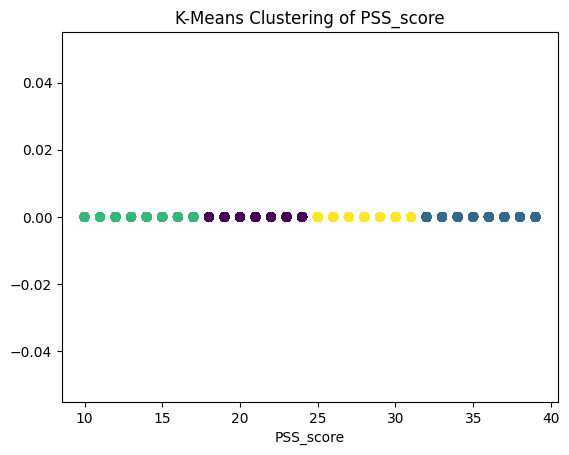

In [3]:
# Trích xuất cột PSS_score
pss_data = df[['PSS_score']]

# Xử lý giá trị thiếu nếu có
pss_data = pss_data.dropna()

# Áp dụng K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Chọn số cụm, ví dụ: 3
kmeans.fit(pss_data)

# Thêm nhãn cụm vào DataFrame gốc
df['cluster'] = kmeans.labels_

# Kết quả
print(df[['participant_id', 'PSS_score', 'cluster']].head())

# Trực quan hóa kết quả
plt.scatter(pss_data, np.zeros_like(pss_data), c=kmeans.labels_, cmap='viridis')
plt.xlabel('PSS_score')
plt.title('K-Means Clustering of PSS_score')
plt.show()

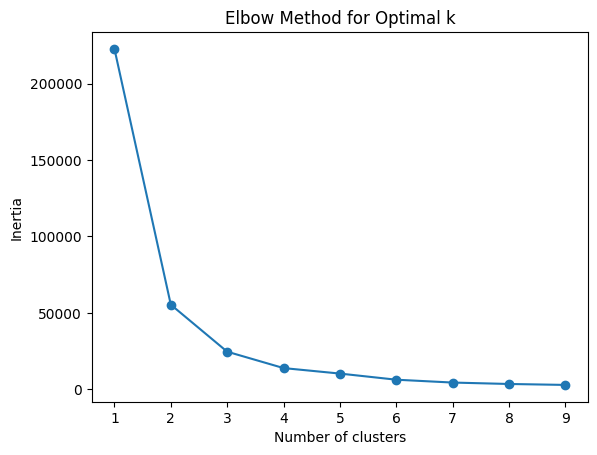

In [9]:
# Tìm số cụm tối ưu bằng Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pss_data)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()